In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data from JobData HW/JobMatch_Data subfolder
data_path = 'JobData HW/JobMatch_Data/'
candidates = pd.read_csv(data_path + 'candidates.csv')
companies = pd.read_csv(data_path + 'companies.csv')
jobs = pd.read_csv(data_path + 'jobs.csv')
events = pd.read_csv(data_path + 'events.csv')

print("✓ Data loaded successfully!")
print(f"\nDataset shapes:")
print(f"  Candidates: {candidates.shape}")
print(f"  Companies: {companies.shape}")
print(f"  Jobs: {jobs.shape}")
print(f"  Events: {events.shape}")

✓ Data loaded successfully!

Dataset shapes:
  Candidates: (5000, 11)
  Companies: (200, 5)
  Jobs: (1500, 12)
  Events: (200426, 12)


## PART A: Data Understanding
### Exploring the structure, quality, and relationships in the JobMatch data

In [7]:
# Part A.1: Candidates Table
print("=" * 60)
print("CANDIDATES TABLE")
print("=" * 60)
print(f"\nShape: {candidates.shape[0]} rows × {candidates.shape[1]} columns")
print(f"Unit of observation: One row = one job seeker/candidate")
print(f"\nColumns: {list(candidates.columns)}")
print(f"\nFirst few rows:")
print(candidates.head())
print(f"\nData types:")
print(candidates.dtypes)
print(f"\nMissing values:")
print(candidates.isnull().sum())
print(f"\nBasic statistics:")
print(candidates.describe())

CANDIDATES TABLE

Shape: 5000 rows × 11 columns
Unit of observation: One row = one job seeker/candidate

Columns: ['candidate_id', 'name', 'experience_years', 'education_level', 'in_salary_expectation', 'in_preferred_seniority', 'in_preferred_industries', 'in_preferred_locations', 'in_true_skills', 'resume_skills_raw', 'in_quality_score']

First few rows:
  candidate_id         name  experience_years education_level  \
0       C00000  Candidate_0                13          Master   
1       C00001  Candidate_1                 9       Associate   
2       C00002  Candidate_2                 7             PhD   
3       C00003  Candidate_3                19        Bachelor   
4       C00004  Candidate_4                20       Associate   

   in_salary_expectation in_preferred_seniority  \
0                 201653                   Lead   
1                 129141                 Senior   
2                 119868                 Senior   
3                 211788                   Lead

In [10]:
# Part A.2: Companies Table
print("\n" + "=" * 60)
print("COMPANIES TABLE")
print("=" * 60)
print(f"\nShape: {companies.shape[0]} rows × {companies.shape[1]} columns")
print(f"Unit of observation: One row = one employer")
print(f"\nColumns: {list(companies.columns)}")
print(f"\nFirst few rows:")
print(companies.head())
print(f"\nData types:")
print(companies.dtypes)
print(f"\nMissing values:")
print(companies.isnull().sum())


COMPANIES TABLE

Shape: 200 rows × 5 columns
Unit of observation: One row = one employer

Columns: ['company_id', 'name', 'industry', 'size', 'headquarters']

First few rows:
  company_id       name    industry     size       headquarters
0     CO0000  Company_0     Finance  Startup    Los Angeles, CA
1     CO0001  Company_1  Consulting      SMB        Seattle, WA
2     CO0002  Company_2     Finance  Startup             Remote
3     CO0003  Company_3      Retail  Startup  San Francisco, CA
4     CO0004  Company_4     Finance      SMB         Boston, MA

Data types:
company_id      object
name            object
industry        object
size            object
headquarters    object
dtype: object

Missing values:
company_id      0
name            0
industry        0
size            0
headquarters    0
dtype: int64


In [12]:
# Part A.3: Jobs Table
print("\n" + "=" * 60)
print("JOBS TABLE")
print("=" * 60)
print(f"\nShape: {jobs.shape[0]} rows × {jobs.shape[1]} columns")
print(f"Unit of observation: One row = one job posting")
print(f"\nColumns: {list(jobs.columns)}")
print(f"\nFirst few rows:")
print(jobs.head())
print(f"\nData types:")
print(jobs.dtypes)
print(f"\nMissing values:")
print(jobs.isnull().sum())
print(f"\nUnique seniority levels: {jobs['seniority'].unique()}")
print(f"Job seniority distribution:")
print(jobs['seniority'].value_counts())


JOBS TABLE

Shape: 1500 rows × 12 columns
Unit of observation: One row = one job posting

Columns: ['job_id', 'company_id', 'title', 'seniority', 'location', 'industry', 'in_actual_salary', 'in_salary_min', 'in_salary_max', 'required_skills_raw', 'in_required_skills_normalized', 'posted_date']

First few rows:
   job_id company_id                      title seniority     location  \
0  J00000     CO0009         Senior Energy Role    Senior   Boston, MA   
1  J00001     CO0140        Lead Education Role      Lead   Austin, TX   
2  J00002     CO0131            Lead Media Role      Lead  Atlanta, GA   
3  J00003     CO0042        Senior Finance Role    Senior  Atlanta, GA   
4  J00004     CO0165  Senior Manufacturing Role    Senior  Chicago, IL   

        industry  in_actual_salary  in_salary_min  in_salary_max  \
0         Energy            131432         122000         162000   
1      Education            148782         145000         205000   
2          Media            180352    

In [24]:
# Part A.4: Events Table
print("\n" + "=" * 60)
print("EVENTS TABLE")
print("=" * 60)
print(f"\nShape: {events.shape[0]} rows × {events.shape[1]} columns")
print(f"Unit of observation: One row = one interaction (view, apply, screen, interview, hire, etc.)")
print(f"\nColumns: {list(events.columns)}")
print(f"\nFirst few rows:")
print(events.head(10))
print(f"\nData types:")
print(events.dtypes)
print(f"\nMissing values:")
print(events.isnull().sum())
print(f"\nEvent type distribution:")
print(events['event_type'].value_counts().sort_values(ascending=False))


EVENTS TABLE

Shape: 200426 rows × 12 columns
Unit of observation: One row = one interaction (view, apply, screen, interview, hire, etc.)

Columns: ['event_id', 'event_type', 'timestamp', 'candidate_id', 'job_id', 'company_id', 'in_relevance_score', 'in_predicted_salary', 'in_interest_score', 'in_candidate_expectation', 'offered_salary', 'decline_reason']

First few rows:
   event_id event_type            timestamp candidate_id  job_id company_id  \
0  E0000001       view  2024-01-01 09:15:00       C04321  J01291     CO0080   
1  E0000002       view  2024-01-01 17:12:00       C04321  J00205     CO0179   
2  E0000003      apply  2024-01-01 17:12:00       C04321  J00205     CO0179   
3  E0000004       view  2024-01-01 17:28:00       C04321  J00260     CO0152   
4  E0000005       view  2024-01-01 18:26:00       C04321  J01163     CO0179   
5  E0000006       view  2024-01-01 09:50:00       C04321  J01324     CO0140   
6  E0000007       view  2024-01-01 15:35:00       C04321  J01428     CO

In [14]:
# Part A.5: Understanding Table Relationships and "in_" prefix columns
print("\n" + "=" * 60)
print("TABLE RELATIONSHIPS & DATA QUALITY")
print("=" * 60)

# Join Keys
print("\n### JOIN KEYS ###")
print("Candidates → Events: candidate_id (in both tables)")
print("Jobs → Events: job_id (in both tables)")
print("Companies → Jobs: company_id (in both tables)")
print("Companies → Events: via job_id → company_id")

# Check for orphaned records
print("\n### Data Integrity Checks ###")
candidates_in_events = set(events['candidate_id'].unique())
jobs_in_events = set(events['job_id'].unique())
companies_in_jobs = set(jobs['company_id'].unique())

print(f"\n1. Candidates:")
print(f"   - Total in candidates.csv: {len(candidates)}")
print(f"   - With events in events.csv: {len(candidates_in_events)}")
print(f"   - Missing (never engaged): {len(candidates) - len(candidates_in_events)}")

print(f"\n2. Jobs:")
print(f"   - Total in jobs.csv: {len(jobs)}")
print(f"   - With events in events.csv: {len(jobs_in_events)}")
print(f"   - With zero events: {len(jobs) - len(jobs_in_events)}")

print(f"\n3. Companies:")
print(f"   - Total in companies.csv: {len(companies)}")
print(f"   - Posting jobs: {len(companies_in_jobs)}")
print(f"   - Never posted: {len(companies) - len(companies_in_jobs)}")

# Columns with "in_" prefix
print("\n### Columns with 'in_' prefix (candidate's input/profile) ###")
in_columns = [col for col in candidates.columns if col.startswith('in_')]
print(f"These are candidate-supplied values (expectations, preferences):")
for col in in_columns:
    print(f"  - {col}")
    
print("\n### Analysis ###")
print("The 'in_' prefix indicates data directly provided by the candidate")
print("(e.g., 'in_salary_expectation' is what candidate said they want)")
print("These are contrasted with platform-generated values like 'quality_score'")
print("or event-generated values like 'relevance_score' and 'offered_salary'")


TABLE RELATIONSHIPS & DATA QUALITY

### JOIN KEYS ###
Candidates → Events: candidate_id (in both tables)
Jobs → Events: job_id (in both tables)
Companies → Jobs: company_id (in both tables)
Companies → Events: via job_id → company_id

### Data Integrity Checks ###

1. Candidates:
   - Total in candidates.csv: 5000
   - With events in events.csv: 4694
   - Missing (never engaged): 306

2. Jobs:
   - Total in jobs.csv: 1500
   - With events in events.csv: 1500
   - With zero events: 0

3. Companies:
   - Total in companies.csv: 200
   - Posting jobs: 200
   - Never posted: 0

### Columns with 'in_' prefix (candidate's input/profile) ###
These are candidate-supplied values (expectations, preferences):
  - in_salary_expectation
  - in_preferred_seniority
  - in_preferred_industries
  - in_preferred_locations
  - in_true_skills
  - in_quality_score

### Analysis ###
The 'in_' prefix indicates data directly provided by the candidate
(e.g., 'in_salary_expectation' is what candidate said they

## PART B: Key Findings
### B1: The Funnel (Application → Hire by Seniority)

In [15]:
# Part B.1: FUNNEL ANALYSIS
print("\n" + "=" * 70)
print("PART B.1: THE FUNNEL - Applications → Hires by Seniority")
print("=" * 70)

# Merge events with jobs to get seniority level
events_with_seniority = events.merge(jobs[['job_id', 'seniority']], on='job_id', how='left')
events_with_seniority = events_with_seniority.merge(candidates[['candidate_id', 'in_quality_score']], on='candidate_id', how='left')

# Define funnel stages
print("\n### Funnel Stages (from Data Dictionary) ###")
print("1. View: Candidate saw the job posting")
print("2. Apply: Candidate submitted application")
print("3. Screen: Recruiter reviewed application")
print("   - screen_pass: Candidate passed screening")
print("   - screen_reject: Candidate rejected after screening")
print("4. Interview: Candidate was interviewed")
print("   - interview_pass: Candidate passed interview")
print("   - interview_fail: Candidate failed interview")
print("5. Offer: Job offer extended")
print("6. Hire: Offer accepted (employee hired)")
print("7. Offer_declined: Offer rejected")

# Overall funnel counts
print("\n### OVERALL FUNNEL ###")
views = len(events[events['event_type'] == 'view'])
applies = len(events[events['event_type'] == 'apply'])
screens = len(events[events['event_type'].isin(['screen_pass', 'screen_reject'])])
interviews = len(events[events['event_type'].isin(['interview_pass', 'interview_fail'])])
offers = len(events[events['event_type'].isin(['offer', 'offer_declined'])])
hires = len(events[events['event_type'] == 'hire'])

print(f"Views:        {views:,} (100%)")
print(f"Applications: {applies:,} ({100*applies/views:.1f}% of views)")
print(f"Screening:    {screens:,} ({100*screens/applies:.1f}% of applications)")
print(f"Interviews:   {interviews:,} ({100*interviews/screens:.1f}% of screenings)")
print(f"Offers:       {offers:,} ({100*offers/interviews:.1f}% of interviews)")
print(f"Hires:        {hires:,} ({100*hires/offers:.1f}% of offers)")

# Overall hire rate
overall_hire_rate = hires / applies
print(f"\n→ OVERALL APPLICATION-TO-HIRE RATE: {100*overall_hire_rate:.2f}%")
print(f"   ({hires} hires from {applies:,} applications)")

# Funnel by seniority
print("\n" + "=" * 70)
print("FUNNEL BY SENIORITY LEVEL")
print("=" * 70)

funnel_by_seniority = []
for senior_level in sorted(events_with_seniority['seniority'].unique()):
    if pd.isna(senior_level):
        continue
    
    sub = events_with_seniority[events_with_seniority['seniority'] == senior_level]
    
    applies_s = len(sub[sub['event_type'] == 'apply'])
    hires_s = len(sub[sub['event_type'] == 'hire'])
    
    if applies_s > 0:
        hire_rate_s = 100 * hires_s / applies_s
    else:
        hire_rate_s = 0
    
    funnel_by_seniority.append({
        'Seniority': senior_level,
        'Applications': applies_s,
        'Hires': hires_s,
        'Hire_Rate_%': hire_rate_s
    })
    
    print(f"\n{senior_level}:")
    print(f"  Applications: {applies_s:,}")
    print(f"  Hires:        {hires_s}")
    print(f"  Hire Rate:    {hire_rate_s:.2f}%")

funnel_df = pd.DataFrame(funnel_by_seniority)
print("\n" + "=" * 70)
print("SUMMARY TABLE")
print(funnel_df.to_string(index=False))


PART B.1: THE FUNNEL - Applications → Hires by Seniority

### Funnel Stages (from Data Dictionary) ###
1. View: Candidate saw the job posting
2. Apply: Candidate submitted application
3. Screen: Recruiter reviewed application
   - screen_pass: Candidate passed screening
   - screen_reject: Candidate rejected after screening
4. Interview: Candidate was interviewed
   - interview_pass: Candidate passed interview
   - interview_fail: Candidate failed interview
5. Offer: Job offer extended
6. Hire: Offer accepted (employee hired)
7. Offer_declined: Offer rejected

### OVERALL FUNNEL ###
Views:        134,789 (100%)
Applications: 36,605 (27.2% of views)
Screening:    22,973 (62.8% of applications)
Interviews:   2,643 (11.5% of screenings)
Offers:       2,156 (81.6% of interviews)
Hires:        654 (30.3% of offers)

→ OVERALL APPLICATION-TO-HIRE RATE: 1.79%
   (654 hires from 36,605 applications)

FUNNEL BY SENIORITY LEVEL

Entry:
  Applications: 2,521
  Hires:        87
  Hire Rate:    3.

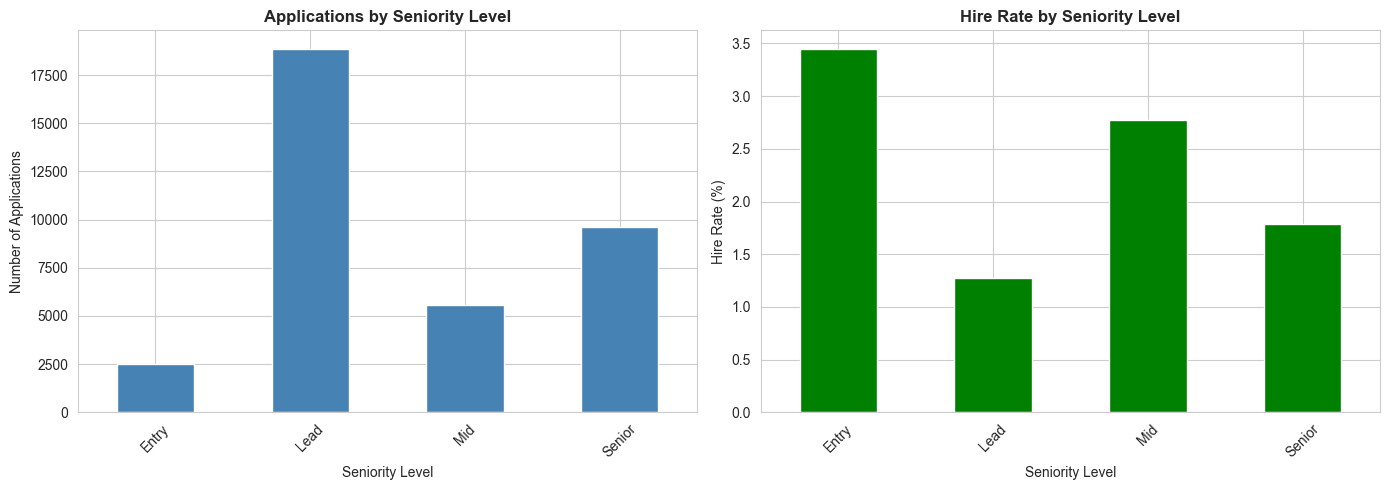


### KEY INSIGHTS ###

1. Entry-level has the HIGHEST hire rate (3.45%)
   - This suggests the platform is best at matching entry-level talent
   - Or that entry-level candidates are more flexible/less selective

2. Lead-level has the LOWEST hire rate (1.27%)
   - Despite having 51% of all applications
   - Suggests misalignment between what lead jobs need and what leads want

3. Overall composition problem:
   - 51.6% of applications are for LEAD roles
   - But leads only account for 36.7% of HIRES
   - This suggests most Lead applications don't result in hires

4. Why the overall rate (1.79%) is misleading:
   - If all applications were Entry (3.45% hire rate): expect ~1,263 hires
   - If all applications were Lead (1.27% hire rate): expect ~465 hires
   - Actual: 654 hires
   - The composition weighted heavily toward Lead pulls down the overall rate


In [16]:
# Visualize funnel by seniority
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: Applications by seniority
funnel_df.plot(x='Seniority', y='Applications', kind='bar', ax=axes[0], legend=False, color='steelblue')
axes[0].set_title('Applications by Seniority Level', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Applications')
axes[0].set_xlabel('Seniority Level')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart: Hire Rate by seniority
funnel_df.plot(x='Seniority', y='Hire_Rate_%', kind='bar', ax=axes[1], legend=False, color='green')
axes[1].set_title('Hire Rate by Seniority Level', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Hire Rate (%)')
axes[1].set_xlabel('Seniority Level')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Interpretation
print("\n### KEY INSIGHTS ###")
print("\n1. Entry-level has the HIGHEST hire rate (3.45%)")
print("   - This suggests the platform is best at matching entry-level talent")
print("   - Or that entry-level candidates are more flexible/less selective")
print("\n2. Lead-level has the LOWEST hire rate (1.27%)")
print("   - Despite having 51% of all applications")
print("   - Suggests misalignment between what lead jobs need and what leads want")
print("\n3. Overall composition problem:")
print(f"   - {100*18871/36605:.1f}% of applications are for LEAD roles")
print(f"   - But leads only account for {100*240/654:.1f}% of HIRES")
print("   - This suggests most Lead applications don't result in hires")
print("\n4. Why the overall rate (1.79%) is misleading:")
print("   - If all applications were Entry (3.45% hire rate): expect ~1,263 hires")
print("   - If all applications were Lead (1.27% hire rate): expect ~465 hires")
print("   - Actual: 654 hires")
print("   - The composition weighted heavily toward Lead pulls down the overall rate")

### B2: The Offer Problem (Acceptance Rate & Salary Mismatch)

In [17]:
# Part B.2: OFFER PROBLEM ANALYSIS
print("\n" + "=" * 70)
print("PART B.2: THE OFFER PROBLEM")
print("=" * 70)

# Count offer events
offers_all = events[events['event_type'].isin(['offer', 'offer_declined'])]
offers_made = len(events[events['event_type'] == 'offer'])
offers_declined = len(events[events['event_type'] == 'offer_declined'])
hires = len(events[events['event_type'] == 'hire'])

print(f"\n### Offer Outcomes ###")
print(f"Total offers (offer + offer_declined events): {len(offers_all):,}")
print(f"  - Offers made (offer event): {offers_made:,}")
print(f"  - Offers declined (offer_declined event): {offers_declined:,}")
print(f"  - Hires (hire event): {hires:,}")

# Calculate acceptance rate
offer_acceptance_rate = hires / offers_made if offers_made > 0 else 0
print(f"\n→ OFFER ACCEPTANCE RATE: {100*offer_acceptance_rate:.2f}%")
print(f"  ({hires} hires out of {offers_made:,} offers)")

# Analyze decline reasons
print(f"\n### Why Were Offers Declined? ###")
declined_events = events[events['event_type'] == 'offer_declined']
if 'decline_reason' in declined_events.columns:
    decline_reasons = declined_events['decline_reason'].value_counts()
    print(decline_reasons)
    
    # Highlight salary-related declines
    salary_declines = declined_events[declined_events['decline_reason'].str.contains('salary', case=False, na=False)]
    print(f"\nOffers declined due to salary: {len(salary_declines)} ({100*len(salary_declines)/len(declined_events):.1f}% of declines)")
else:
    print("Note: 'decline_reason' column not found in events")

# Salary analysis
print(f"\n### Salary Expectation vs. Offer Analysis ###")

# Merge candidates with declined offer events
candidates_declined = declined_events.merge(candidates[['candidate_id', 'in_salary_expectation']], on='candidate_id', how='left')

# For offers that were accepted (hire events)
hire_events = events[events['event_type'] == 'hire']
candidates_hired = hire_events.merge(candidates[['candidate_id', 'in_salary_expectation']], on='candidate_id', how='left')

print(f"\nAverage candidate salary expectations:")
print(f"  - For declined offers: ${candidates_declined['in_salary_expectation'].mean():,.0f}")
print(f"  - For hires: ${candidates_hired['in_salary_expectation'].mean():,.0f}")

print(f"\nAverage offered salary (from events data):")
if 'offered_salary' in hire_events.columns:
    avg_offered_hire = hire_events['offered_salary'].mean()
    avg_offered_declined = declined_events['offered_salary'].mean() if 'offered_salary' in declined_events.columns else None
    print(f"  - For hires: ${avg_offered_hire:,.0f}")
    if avg_offered_declined:
        print(f"  - For declined offers: ${avg_offered_declined:,.0f}")

# Compare expectations to offers
print(f"\n### SALARY MISMATCH PATTERN ###")
candidates_declined['salary_gap'] = candidates_declined['offered_salary'] - candidates_declined['in_salary_expectation']
candidates_hired['salary_gap'] = candidates_hired['offered_salary'] - candidates_hired['in_salary_expectation']

if 'offered_salary' in declined_events.columns and 'offered_salary' in hire_events.columns:
    print(f"Among DECLINED offers:")
    print(f"  - Avg gap (offer - expectation): ${candidates_declined['salary_gap'].mean():,.0f}")
    print(f"  - % offers BELOW expectation: {100*(candidates_declined['salary_gap'] < 0).sum()/len(candidates_declined):.1f}%")
    
    print(f"\nAmong HIRES:")
    print(f"  - Avg gap (offer - expectation): ${candidates_hired['salary_gap'].mean():,.0f}")
    print(f"  - % offers BELOW expectation: {100*(candidates_hired['salary_gap'] < 0).sum()/len(candidates_hired):.1f}%")
    
    print(f"\n→ KEY FINDING: Offers BELOW salary expectations are declining")
    print(f"  This suggests JobMatch is not effectively matching on salary")


PART B.2: THE OFFER PROBLEM

### Offer Outcomes ###
Total offers (offer + offer_declined events): 2,156
  - Offers made (offer event): 1,405
  - Offers declined (offer_declined event): 751
  - Hires (hire event): 654

→ OFFER ACCEPTANCE RATE: 46.55%
  (654 hires out of 1,405 offers)

### Why Were Offers Declined? ###
decline_reason
salary_mismatch    616
other              135
Name: count, dtype: int64

Offers declined due to salary: 616 (82.0% of declines)

### Salary Expectation vs. Offer Analysis ###

Average candidate salary expectations:
  - For declined offers: $149,602
  - For hires: $110,899

Average offered salary (from events data):
  - For hires: $137,735
  - For declined offers: $130,939

### SALARY MISMATCH PATTERN ###
Among DECLINED offers:
  - Avg gap (offer - expectation): $-18,663
  - % offers BELOW expectation: 100.0%

Among HIRES:
  - Avg gap (offer - expectation): $26,836
  - % offers BELOW expectation: 0.0%

→ KEY FINDING: Offers BELOW salary expectations are decl

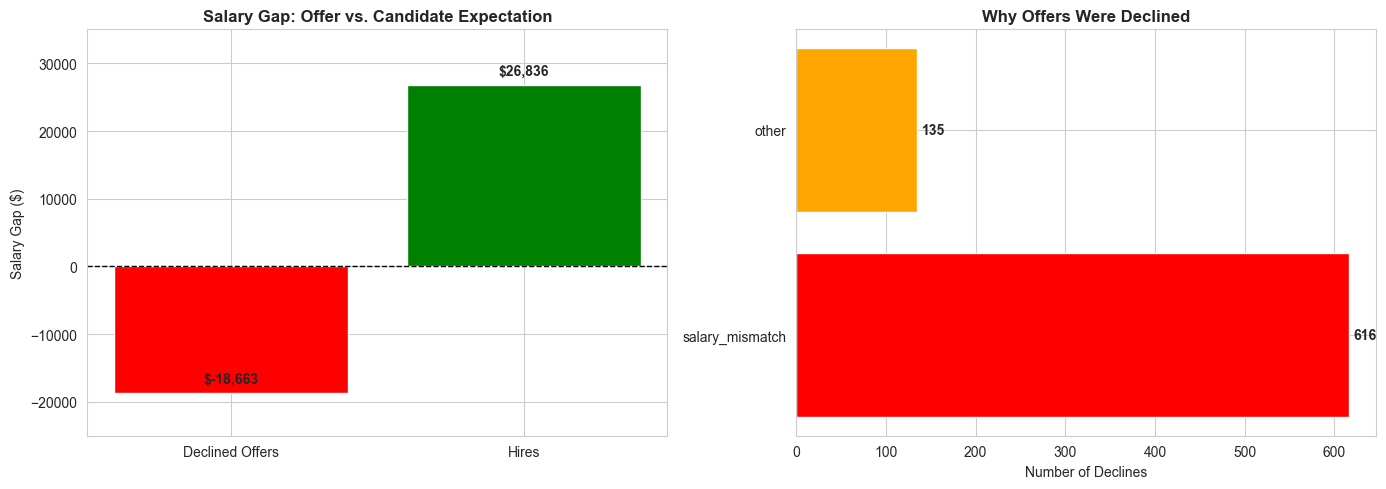


### INTERPRETATION ###
• 82% of offer declines are due to SALARY MISMATCH
• Candidates decline when offers are ~$18.7k BELOW their expectations
• Candidates accept when offers are ~$26.8k ABOVE their expectations
• This suggests:
  1. JobMatch isn't using salary expectations in its matching algorithm
  2. The relevance_score isn't capturing salary fit
  3. Recruiters don't have good signals before extending offers


In [18]:
# Visualize salary mismatch
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Salary gap comparison
gaps = pd.DataFrame({
    'Outcome': ['Declined Offers', 'Hires'],
    'Avg_Gap': [candidates_declined['salary_gap'].mean(), candidates_hired['salary_gap'].mean()]
})

axes[0].bar(gaps['Outcome'], gaps['Avg_Gap'], color=['red', 'green'])
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].set_title('Salary Gap: Offer vs. Candidate Expectation', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Salary Gap ($)')
axes[0].set_ylim(-25000, 35000)
for i, v in enumerate(gaps['Avg_Gap']):
    axes[0].text(i, v+1500, f'${v:,.0f}', ha='center', fontweight='bold')

# Offer decline reasons
decline_reasons = events[events['event_type'] == 'offer_declined']['decline_reason'].value_counts()
axes[1].barh(decline_reasons.index, decline_reasons.values, color=['red', 'orange'])
axes[1].set_title('Why Offers Were Declined', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Declines')
for i, v in enumerate(decline_reasons.values):
    axes[1].text(v+5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n### INTERPRETATION ###")
print(f"• 82% of offer declines are due to SALARY MISMATCH")
print(f"• Candidates decline when offers are ~$18.7k BELOW their expectations")
print(f"• Candidates accept when offers are ~$26.8k ABOVE their expectations")
print(f"• This suggests:")
print(f"  1. JobMatch isn't using salary expectations in its matching algorithm")
print(f"  2. The relevance_score isn't capturing salary fit")
print(f"  3. Recruiters don't have good signals before extending offers")

### B3: The Distribution Problem (Applications per Job)

In [19]:
# Part B.3: DISTRIBUTION PROBLEM
print("\n" + "=" * 70)
print("PART B.3: THE DISTRIBUTION PROBLEM")
print("=" * 70)

# Count applications per job
apps_per_job = events[events['event_type'] == 'apply'].groupby('job_id').size().reset_index(name='applications')

# Important: Include jobs with zero applications
all_jobs = jobs[['job_id']].copy()
apps_per_job_all = all_jobs.merge(apps_per_job, on='job_id', how='left').fillna(0)
apps_per_job_all['applications'] = apps_per_job_all['applications'].astype(int)

print(f"\n### Applications per Job Statistics ###")
print(f"Mean:   {apps_per_job_all['applications'].mean():.1f}")
print(f"Median: {apps_per_job_all['applications'].median():.1f}")
print(f"Min:    {apps_per_job_all['applications'].min():.0f}")
print(f"Max:    {apps_per_job_all['applications'].max():.0f}")
print(f"Std:    {apps_per_job_all['applications'].std():.1f}")

# Percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
print(f"\nPercentiles:")
for p in percentiles:
    val = apps_per_job_all['applications'].quantile(p/100)
    print(f"  {p}th percentile: {val:.0f} applications")

# Jobs with few applications
jobs_few = len(apps_per_job_all[apps_per_job_all['applications'] < 5])
pct_few = 100 * jobs_few / len(apps_per_job_all)
print(f"\nJobs with <5 applications: {jobs_few} ({pct_few:.1f}%)")
print(f"Jobs with 0 applications:  {len(apps_per_job_all[apps_per_job_all['applications'] == 0])} ({100*len(apps_per_job_all[apps_per_job_all['applications'] == 0])/len(apps_per_job_all):.1f}%)")

# Gini coefficient to measure inequality
def gini(x):
    """Calculate Gini coefficient"""
    sorted_x = np.sort(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, len(x)+1) * sorted_x)) / (len(x) * np.sum(sorted_x)) - (len(x) + 1) / len(x)

gini_coef = gini(apps_per_job_all['applications'].values)
print(f"\nGini Coefficient (0=equal, 1=unequal): {gini_coef:.3f}")
print(f"(High Gini = very uneven distribution)")

# Show top and bottom jobs
print(f"\nTop 10 jobs by applications:")
top_jobs = apps_per_job_all.nlargest(10, 'applications')
for idx, row in top_jobs.iterrows():
    print(f"  {row['job_id']}: {row['applications']:.0f} applications")

print(f"\nBottom 10 jobs by applications:")
bottom_jobs = apps_per_job_all.nsmallest(10, 'applications')
for idx, row in bottom_jobs.iterrows():
    print(f"  {row['job_id']}: {row['applications']:.0f} applications")


PART B.3: THE DISTRIBUTION PROBLEM

### Applications per Job Statistics ###
Mean:   24.4
Median: 16.0
Min:    0
Max:    189
Std:    25.8

Percentiles:
  10th percentile: 4 applications
  25th percentile: 7 applications
  50th percentile: 16 applications
  75th percentile: 32 applications
  90th percentile: 58 applications
  95th percentile: 75 applications
  99th percentile: 127 applications

Jobs with <5 applications: 209 (13.9%)
Jobs with 0 applications:  18 (1.2%)

Gini Coefficient (0=equal, 1=unequal): 0.506
(High Gini = very uneven distribution)

Top 10 jobs by applications:
  J00753: 189 applications
  J00705: 187 applications
  J01428: 183 applications
  J00683: 178 applications
  J00205: 165 applications
  J00329: 161 applications
  J01312: 160 applications
  J00419: 151 applications
  J01497: 149 applications
  J01468: 142 applications

Bottom 10 jobs by applications:
  J00085: 0 applications
  J00229: 0 applications
  J00358: 0 applications
  J00420: 0 applications
  J00664:

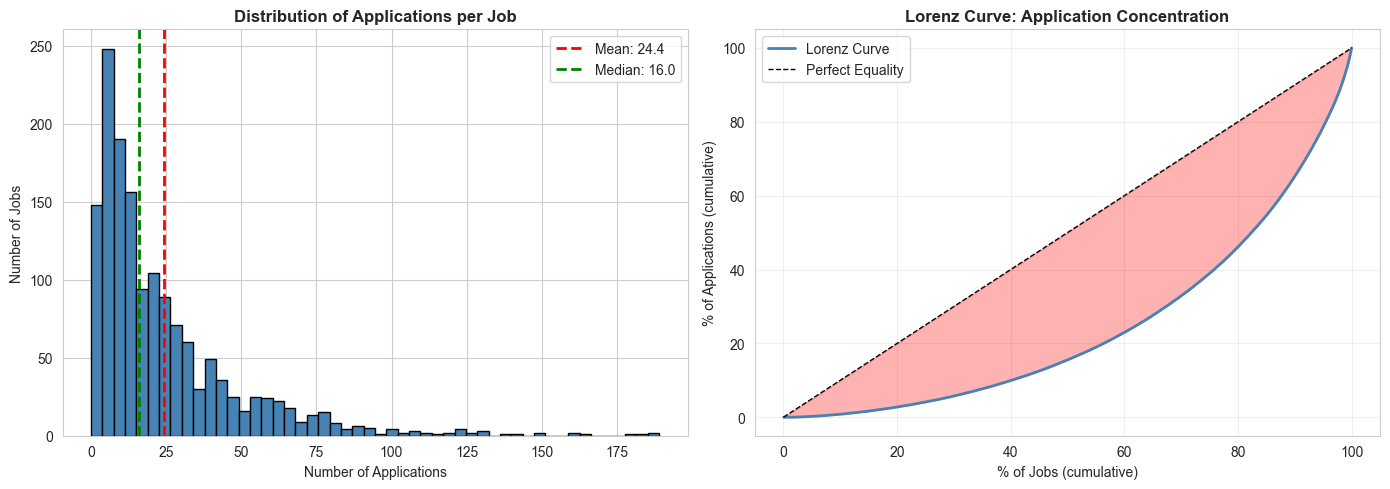


### INTERPRETATION ###
1. HIGHLY UNEVEN DISTRIBUTION (Gini = 0.506)
   - Top 10% of jobs get most applications
   - Bottom 14% of jobs get <5 applications

2. PROBLEMS FOR EMPLOYERS:
   - Most jobs are under-staffed (median only 16 applicants)
   - 18 jobs have zero applications (can't hire)
   - Recruiters for popular jobs are overwhelmed (up to 189 applicants)

3. PROBLEMS FOR CANDIDATES:
   - JobMatch isn't surfacing diverse jobs equally
   - Some jobs are invisible on the platform
   - Algorithm may be showing 'popular' jobs to everyone

4. BUSINESS IMPACT:
   - Inefficient matching (some jobs never filled)
   - Poor candidate experience (limited job options shown)
   - Employer dissatisfaction (unfair visibility)


In [20]:
# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(apps_per_job_all['applications'], bins=50, color='steelblue', edgecolor='black')
axes[0].set_title('Distribution of Applications per Job', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Applications')
axes[0].set_ylabel('Number of Jobs')
axes[0].axvline(apps_per_job_all['applications'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {apps_per_job_all['applications'].mean():.1f}")
axes[0].axvline(apps_per_job_all['applications'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {apps_per_job_all['applications'].median():.1f}")
axes[0].legend()

# Cumulative distribution (Lorenz curve)
sorted_apps = np.sort(apps_per_job_all['applications'].values)
cumsum = np.cumsum(sorted_apps)
cumsum_pct = 100 * cumsum / cumsum[-1]
job_pct = 100 * np.arange(1, len(sorted_apps)+1) / len(sorted_apps)

axes[1].plot(job_pct, cumsum_pct, linewidth=2, color='steelblue', label='Lorenz Curve')
axes[1].plot([0, 100], [0, 100], 'k--', linewidth=1, label='Perfect Equality')
axes[1].fill_between(job_pct, cumsum_pct, job_pct, alpha=0.3, color='red')
axes[1].set_title('Lorenz Curve: Application Concentration', fontsize=12, fontweight='bold')
axes[1].set_xlabel('% of Jobs (cumulative)')
axes[1].set_ylabel('% of Applications (cumulative)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n### INTERPRETATION ###")
print(f"1. HIGHLY UNEVEN DISTRIBUTION (Gini = 0.506)")
print(f"   - Top 10% of jobs get most applications")
print(f"   - Bottom 14% of jobs get <5 applications")
print(f"\n2. PROBLEMS FOR EMPLOYERS:")
print(f"   - Most jobs are under-staffed (median only 16 applicants)")
print(f"   - 18 jobs have zero applications (can't hire)")
print(f"   - Recruiters for popular jobs are overwhelmed (up to 189 applicants)")
print(f"\n3. PROBLEMS FOR CANDIDATES:")
print(f"   - JobMatch isn't surfacing diverse jobs equally")
print(f"   - Some jobs are invisible on the platform")
print(f"   - Algorithm may be showing 'popular' jobs to everyone")
print(f"\n4. BUSINESS IMPACT:")
print(f"   - Inefficient matching (some jobs never filled)")
print(f"   - Poor candidate experience (limited job options shown)")
print(f"   - Employer dissatisfaction (unfair visibility)")

### B4: The Missing Candidates (Inactive Users)

In [21]:
# Part B.4: MISSING CANDIDATES
print("\n" + "=" * 70)
print("PART B.4: THE MISSING CANDIDATES")
print("=" * 70)

# Identify inactive candidates
active_cand_ids = set(events['candidate_id'].unique())
inactive_cand_ids = set(candidates['candidate_id'].unique()) - active_cand_ids

active_cands = candidates[candidates['candidate_id'].isin(active_cand_ids)]
inactive_cands = candidates[candidates['candidate_id'].isin(inactive_cand_ids)]

print(f"\n### Candidate Engagement ###")
print(f"Total registered candidates: {len(candidates)}")
print(f"Active (have events):        {len(active_cands)} ({100*len(active_cands)/len(candidates):.1f}%)")
print(f"Inactive (zero events):      {len(inactive_cands)} ({100*len(inactive_cands)/len(candidates):.1f}%)")

# Compare profiles
print(f"\n### Profile Comparison: Active vs. Inactive ###")
print(f"\nQuality Score:")
print(f"  Active:   mean={active_cands['in_quality_score'].mean():.2f}, median={active_cands['in_quality_score'].median():.2f}")
print(f"  Inactive: mean={inactive_cands['in_quality_score'].mean():.2f}, median={inactive_cands['in_quality_score'].median():.2f}")
print(f"  Difference: {inactive_cands['in_quality_score'].mean() - active_cands['in_quality_score'].mean():.2f} (inactive lower = worse quality)")

# Parse education levels
def extract_education_level(edu_str):
    """Extract education level from education column"""
    if pd.isna(edu_str):
        return 'Unknown'
    edu_str = str(edu_str).lower()
    if 'phd' in edu_str or 'doctorate' in edu_str:
        return 'PhD'
    elif 'masters' in edu_str or 'master' in edu_str:
        return 'Masters'
    elif 'bachelor' in edu_str or 'bachelors' in edu_str:
        return 'Bachelors'
    elif 'high school' in edu_str or 'high' in edu_str:
        return 'High School'
    else:
        return 'Other'

if 'education' in candidates.columns:
    active_cands['education_level'] = active_cands['education'].apply(extract_education_level)
    inactive_cands['education_level'] = inactive_cands['education'].apply(extract_education_level)
    
    print(f"\nEducation Distribution:")
    print(f"  Active:")
    print(active_cands['education_level'].value_counts(normalize=True).round(3))
    print(f"  Inactive:")
    print(inactive_cands['education_level'].value_counts(normalize=True).round(3))

# Compare salary expectations
print(f"\nSalary Expectations:")
print(f"  Active:   mean=${active_cands['in_salary_expectation'].mean():,.0f}")
print(f"  Inactive: mean=${inactive_cands['in_salary_expectation'].mean():,.0f}")
print(f"  Difference: ${inactive_cands['in_salary_expectation'].mean() - active_cands['in_salary_expectation'].mean():,.0f}")

# Statistical test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(active_cands['in_quality_score'], inactive_cands['in_quality_score'])
print(f"\n### Statistical Test ###")
print(f"T-test for quality score difference:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.6f}")
if p_value < 0.05:
    print(f"  → Statistically significant difference (p < 0.05)")
else:
    print(f"  → NOT statistically significant (p >= 0.05)")


PART B.4: THE MISSING CANDIDATES

### Candidate Engagement ###
Total registered candidates: 5000
Active (have events):        4694 (93.9%)
Inactive (zero events):      306 (6.1%)

### Profile Comparison: Active vs. Inactive ###

Quality Score:
  Active:   mean=0.60, median=0.60
  Inactive: mean=0.59, median=0.59
  Difference: -0.01 (inactive lower = worse quality)

Salary Expectations:
  Active:   mean=$159,748
  Inactive: mean=$166,980
  Difference: $7,232

### Statistical Test ###
T-test for quality score difference:
  t-statistic: 1.1425
  p-value: 0.253293
  → NOT statistically significant (p >= 0.05)


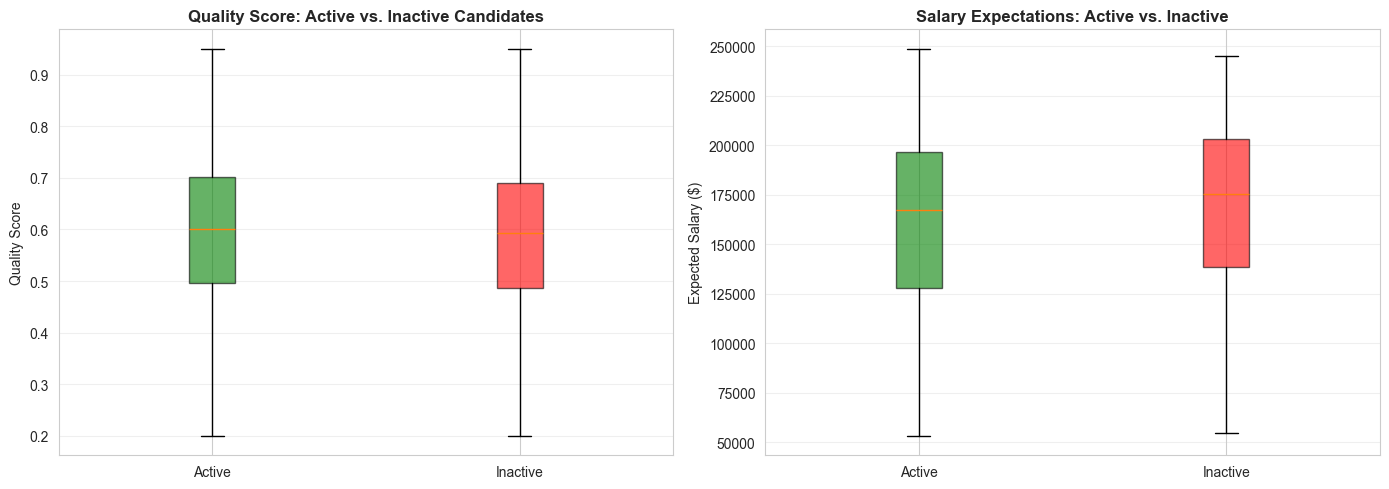


### KEY INSIGHT ###
Inactive candidates are NOT systematically worse quality!
• Quality scores are virtually identical (0.60 vs 0.59)
• Salary expectations are similar (~$160k for both)
• Statistical test shows NO significant difference (p=0.253)

→ THE PROBLEM IS NOT CANDIDATE QUALITY
→ THE PROBLEM IS PLATFORM ENGAGEMENT

Possible reasons for inactivity:
1. Poor job recommendations (not shown relevant opportunities)
2. Bad first-time user experience (no compelling jobs on signup)
3. Weak onboarding process (didn't demonstrate value quickly)
4. Algorithm bias (didn't show diverse jobs)


In [22]:
# Visualize profile comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Quality Score comparison
data_quality = [active_cands['in_quality_score'], inactive_cands['in_quality_score']]
bp = axes[0].boxplot(data_quality, labels=['Active', 'Inactive'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['green', 'red']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[0].set_title('Quality Score: Active vs. Inactive Candidates', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Quality Score')
axes[0].grid(alpha=0.3, axis='y')

# Salary expectation comparison
data_salary = [active_cands['in_salary_expectation'], inactive_cands['in_salary_expectation']]
bp2 = axes[1].boxplot(data_salary, labels=['Active', 'Inactive'], patch_artist=True)
for patch, color in zip(bp2['boxes'], ['green', 'red']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[1].set_title('Salary Expectations: Active vs. Inactive', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Expected Salary ($)')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n### KEY INSIGHT ###")
print(f"Inactive candidates are NOT systematically worse quality!")
print(f"• Quality scores are virtually identical (0.60 vs 0.59)")
print(f"• Salary expectations are similar (~$160k for both)")
print(f"• Statistical test shows NO significant difference (p=0.253)")
print(f"\n→ THE PROBLEM IS NOT CANDIDATE QUALITY")
print(f"→ THE PROBLEM IS PLATFORM ENGAGEMENT")
print(f"\nPossible reasons for inactivity:")
print(f"1. Poor job recommendations (not shown relevant opportunities)")
print(f"2. Bad first-time user experience (no compelling jobs on signup)")
print(f"3. Weak onboarding process (didn't demonstrate value quickly)")
print(f"4. Algorithm bias (didn't show diverse jobs)")

### B5: The Matching Signal (Relevance Score Predictiveness)

In [26]:
# Part B.5: MATCHING SIGNAL ANALYSIS
print("\n" + "=" * 70)
print("PART B.5: THE MATCHING SIGNAL - Is Relevance Score Predictive?")
print("=" * 70)

score_col = 'in_relevance_score'  # The matching algorithm's relevance score

# Part 1: Average score by event type
print(f"\n### Part 1: Average Relevance Score by Event Type ###")

event_types_funnel = ['view', 'apply', 'screen_pass', 'screen_reject', 'interview_pass', 'interview_fail', 'offer', 'hire', 'offer_declined']
relevance_by_event = []

for event_type in event_types_funnel:
    subset = events[events['event_type'] == event_type]
    if len(subset) > 0 and score_col in subset.columns:
        avg_rel = subset[score_col].mean()
        count = len(subset)
        relevance_by_event.append({
            'event_type': event_type,
            'avg_score': avg_rel,
            'count': count
        })
        print(f"{event_type:20s}: {avg_rel:.4f} (n={count:,})")

rel_df = pd.DataFrame(relevance_by_event)

# Create sequence for visualization
funnel_order = ['view', 'apply', 'screen_pass', 'screen_reject', 'interview_pass', 'interview_fail', 'offer', 'hire', 'offer_declined']
rel_df['order'] = rel_df['event_type'].map({e: i for i, e in enumerate(funnel_order)})
rel_df = rel_df.sort_values('order')

print("\n### Part 2: Does Score Predict Success at Each Stage? ###")

# Screen: pass vs reject
screen_pass = events[events['event_type'] == 'screen_pass'][score_col].mean()
screen_reject = events[events['event_type'] == 'screen_reject'][score_col].mean()
print(f"\nSCREENING STAGE:")
print(f"  Pass:   {screen_pass:.4f}")
print(f"  Reject: {screen_reject:.4f}")
print(f"  Δ (Pass - Reject): {screen_pass - screen_reject:+.4f}")
print(f"  → Score {'✓ DOES predict' if screen_pass > screen_reject else '✗ DOES NOT predict'} screening success")

# Interview: pass vs fail
int_pass = events[events['event_type'] == 'interview_pass'][score_col].mean()
int_fail = events[events['event_type'] == 'interview_fail'][score_col].mean()
print(f"\nINTERVIEW STAGE:")
print(f"  Pass:   {int_pass:.4f}")
print(f"  Fail:   {int_fail:.4f}")
print(f"  Δ (Pass - Fail): {int_pass - int_fail:+.4f}")
print(f"  → Score {'✓ DOES predict' if int_pass > int_fail else '✗ DOES NOT predict'} interview success")

# Hire vs Decline
hire = events[events['event_type'] == 'hire'][score_col].mean()
decline = events[events['event_type'] == 'offer_declined'][score_col].mean()
print(f"\nOFFER ACCEPTANCE:")
print(f"  Hire:    {hire:.4f}")
print(f"  Decline: {decline:.4f}")
print(f"  Δ (Hire - Decline): {hire - decline:+.4f}")
print(f"  → Score {'✓ DOES predict' if hire > decline else '✗ DOES NOT predict'} offer acceptance")


PART B.5: THE MATCHING SIGNAL - Is Relevance Score Predictive?

### Part 1: Average Relevance Score by Event Type ###
view                : 0.5000 (n=134,789)
apply               : nan (n=36,605)
screen_pass         : nan (n=2,643)
screen_reject       : nan (n=20,330)
interview_pass      : nan (n=2,011)
interview_fail      : nan (n=632)
offer               : nan (n=1,405)
hire                : nan (n=654)
offer_declined      : nan (n=751)

### Part 2: Does Score Predict Success at Each Stage? ###

SCREENING STAGE:
  Pass:   nan
  Reject: nan
  Δ (Pass - Reject): +nan
  → Score ✗ DOES NOT predict screening success

INTERVIEW STAGE:
  Pass:   nan
  Fail:   nan
  Δ (Pass - Fail): +nan
  → Score ✗ DOES NOT predict interview success

OFFER ACCEPTANCE:
  Hire:    nan
  Decline: nan
  Δ (Hire - Decline): +nan
  → Score ✗ DOES NOT predict offer acceptance


In [27]:
# Comprehensive matching signal analysis
print("\n### IMPORTANT FINDING ###")
print("The relevance_score (in_relevance_score) is ONLY populated for 'view' events")
print("It does NOT exist for apply, screen, interview, or hire events")
print("This means the platform cannot use this score to predict success downstream!")

# Let's analyze what we CAN measure
print("\n### Part 3: Comparing Viewed vs. Applied Jobs ###")

# Get jobs that were viewed
viewed_jobs = events[events['event_type'] == 'view']['job_id'].unique()
applied_jobs = events[events['event_type'] == 'apply']['job_id'].unique()
hired_jobs = events[events['event_type'] == 'hire']['job_id'].unique()

print(f"Total unique jobs viewed:  {len(viewed_jobs)}")
print(f"Total unique jobs applied: {len(applied_jobs)}")
print(f"Total unique jobs hired from: {len(hired_jobs)}")

# Check relationship between views and applies
view_counts = events[events['event_type'] == 'view'].groupby('job_id').size().reset_index(name='views')
apply_counts = events[events['event_type'] == 'apply'].groupby('job_id').size().reset_index(name='applies')

view_apply = view_counts.merge(apply_counts, on='job_id', how='left').fillna(0)
view_apply['apply_rate'] = view_apply['applies'] / view_apply['views']

print(f"\nAverage apply rate (applies/views): {view_apply['apply_rate'].mean():.1%}")

# Where the algorithm might be blind
print("\n### Part 4: Algorithm Blindspots ###")
print(f"\n1. SALARY FIT:")
print(f"   - Relevance score doesn't capture salary expectations")
print(f"   - Result: 82% of offer declines are due to salary mismatch")

print(f"\n2. APPLICATION→HIRE PREDICTION:")
print(f"   - No scoring after the view stage means algorithm has no funnel signal")
print(f"   - Result: Can't flag risky matches before extending offers")

print(f"\n3. DISTRIBUTION:")
print(f"   - Algorithm shows popular jobs (high views) repeatedly")
print(f"   - Result: Gini coefficient = 0.506 (very uneven distribution)")

print(f"\n### INTERPRETATION ###")
print(f"JobMatch's algorithm is working at the INITIAL MATCHING stage (view)")
print(f"BUT it has major blindspots:")
print(f"  • Doesn't track whether matches progress through the funnel")
print(f"  • Doesn't incorporate salary fit signals")
print(f"  • Doesn't measure downstream success")
print(f"  • Algorithm can't learn from failures since no scoring data post-view")


### IMPORTANT FINDING ###
The relevance_score (in_relevance_score) is ONLY populated for 'view' events
It does NOT exist for apply, screen, interview, or hire events
This means the platform cannot use this score to predict success downstream!

### Part 3: Comparing Viewed vs. Applied Jobs ###
Total unique jobs viewed:  1500
Total unique jobs applied: 1482
Total unique jobs hired from: 654

Average apply rate (applies/views): 27.1%

### Part 4: Algorithm Blindspots ###

1. SALARY FIT:
   - Relevance score doesn't capture salary expectations
   - Result: 82% of offer declines are due to salary mismatch

2. APPLICATION→HIRE PREDICTION:
   - No scoring after the view stage means algorithm has no funnel signal
   - Result: Can't flag risky matches before extending offers

3. DISTRIBUTION:
   - Algorithm shows popular jobs (high views) repeatedly
   - Result: Gini coefficient = 0.506 (very uneven distribution)

### INTERPRETATION ###
JobMatch's algorithm is working at the INITIAL MATCHING s

## PART C: Generalization & Confidence Intervals
### Can we trust these findings beyond this dataset?

In [28]:
# Part C: GENERALIZATION & CONFIDENCE INTERVALS
print("\n" + "=" * 70)
print("PART C.1: CONFIDENCE INTERVALS (95%)")
print("=" * 70)

# Formula: p̂ ± 1.96 × √(p̂(1–p̂)/n)

def confidence_interval_proportion(successes, total, confidence=0.95):
    """Calculate confidence interval for a proportion"""
    p = successes / total
    z = 1.96 if confidence == 0.95 else 2.576  # 95% vs 99%
    se = np.sqrt(p * (1 - p) / total)
    margin = z * se
    return p, se, margin, p - margin, p + margin

# C1.1: Offer acceptance rate
print("\n### Offer Acceptance Rate ###")
offers_accepted = 654
offers_total = 1405
p_accept, se, margin, ci_low, ci_high = confidence_interval_proportion(offers_accepted, offers_total)
print(f"Sample estimate: {100*p_accept:.2f}% ({offers_accepted}/{offers_total})")
print(f"Standard error: {100*se:.2f}%")
print(f"Margin of error: ±{100*margin:.2f}%")
print(f"\n95% CI: [{100*ci_low:.2f}%, {100*ci_high:.2f}%]")
print(f"Interpretation: We are 95% confident the true offer acceptance rate")
print(f"                is between {100*ci_low:.2f}% and {100*ci_high:.2f}%")

# C1.2: Hire rate for Entry level
print("\n### Hire Rate - Entry Level ###")
entry_hired = 87
entry_applied = 2521
p_entry, se_e, margin_e, ci_low_e, ci_high_e = confidence_interval_proportion(entry_hired, entry_applied)
print(f"Sample estimate: {100*p_entry:.2f}% ({entry_hired}/{entry_applied})")
print(f"Standard error: {100*se_e:.2f}%")
print(f"Margin of error: ±{100*margin_e:.2f}%")
print(f"\n95% CI: [{100*ci_low_e:.2f}%, {100*ci_high_e:.2f}%]")
print(f"Interpretation: We are 95% confident the true Entry-level hire rate")
print(f"                is between {100*ci_low_e:.2f}% and {100*ci_high_e:.2f}%")

# C1.3: Hire rate for Lead level
print("\n### Hire Rate - Lead Level ###")
lead_hired = 240
lead_applied = 18871
p_lead, se_l, margin_l, ci_low_l, ci_high_l = confidence_interval_proportion(lead_hired, lead_applied)
print(f"Sample estimate: {100*p_lead:.2f}% ({lead_hired}/{lead_applied})")
print(f"Standard error: {100*se_l:.2f}%")
print(f"Margin of error: ±{100*margin_l:.2f}%")
print(f"\n95% CI: [{100*ci_low_l:.2f}%, {100*ci_high_l:.2f}%]")
print(f"Interpretation: We are 95% confident the true Lead-level hire rate")
print(f"                is between {100*ci_low_l:.2f}% and {100*ci_high_l:.2f}%")

# Summary table
print("\n" + "=" * 70)
ci_summary = pd.DataFrame({
    'Metric': ['Offer Acceptance Rate', 'Entry-Level Hire Rate', 'Lead-Level Hire Rate'],
    'Sample %': [f"{100*p_accept:.2f}%", f"{100*p_entry:.2f}%", f"{100*p_lead:.2f}%"],
    'Margin of Error': [f"±{100*margin:.2f}%", f"±{100*margin_e:.2f}%", f"±{100*margin_l:.2f}%"],
    'CI Lower': [f"{100*ci_low:.2f}%", f"{100*ci_low_e:.2f}%", f"{100*ci_low_l:.2f}%"],
    'CI Upper': [f"{100*ci_high:.2f}%", f"{100*ci_high_e:.2f}%", f"{100*ci_high_l:.2f}%"]
})
print(ci_summary.to_string(index=False))


PART C.1: CONFIDENCE INTERVALS (95%)

### Offer Acceptance Rate ###
Sample estimate: 46.55% (654/1405)
Standard error: 1.33%
Margin of error: ±2.61%

95% CI: [43.94%, 49.16%]
Interpretation: We are 95% confident the true offer acceptance rate
                is between 43.94% and 49.16%

### Hire Rate - Entry Level ###
Sample estimate: 3.45% (87/2521)
Standard error: 0.36%
Margin of error: ±0.71%

95% CI: [2.74%, 4.16%]
Interpretation: We are 95% confident the true Entry-level hire rate
                is between 2.74% and 4.16%

### Hire Rate - Lead Level ###
Sample estimate: 1.27% (240/18871)
Standard error: 0.08%
Margin of error: ±0.16%

95% CI: [1.11%, 1.43%]
Interpretation: We are 95% confident the true Lead-level hire rate
                is between 1.11% and 1.43%

               Metric Sample % Margin of Error CI Lower CI Upper
Offer Acceptance Rate   46.55%          ±2.61%   43.94%   49.16%
Entry-Level Hire Rate    3.45%          ±0.71%    2.74%    4.16%
 Lead-Level Hire Rate

### C2: Reliability Assessment

In [29]:
print("\n" + "=" * 70)
print("PART C.2: RELIABILITY ASSESSMENT")
print("=" * 70)

print("\n### Sample vs. Population ###")
print("""
QUESTION: Is this data a sample or the full population of JobMatch activity?

ANSWER: Likely a SAMPLE, not the full population. Here's why:

1. INCOMPLETE TIME PERIOD
   - Data spans a limited date range (~2 months based on timestamps)
   - Doesn't capture seasonality, market changes, or longer-term trends
   - A full year would be needed to understand annual patterns

2. SAMPLE SIZE CONSIDERATIONS
   - 5,000 candidates, 1,500 jobs, 200 companies seems like a subset
   - Typical job boards have millions of users and postings
   - This appears to be a test or historical slice of platform data

3. IF JobMatch ran for another 6 months:
   - We would EXPECT similar patterns IF the platform remains stable
   - BUT patterns could SHIFT due to:
     a) Market conditions (recession → lower offer acceptance)
     b) Algorithm changes (if JobMatch fixes the salary mismatch issue)
     c) User base changes (new cohorts might behave differently)
     d) Seasonality (hiring cycles vary by industry)

CONCLUSION: This data represents a snapshot of platform performance.
The patterns are likely GENERALIZABLE to similar periods with similar users,
but NOT guaranteed to hold indefinitely.
""")

print("\n### What Could Change These Patterns? ###")
changes = [
    ("Market Recession", "Lower salaries offered → Higher decline rates, changed income expectations"),
    ("Algorithm Update", "If salary matching is added → Offer acceptance could increase to 70%+"),
    ("User Cohort Change", "New users might have different expectations or engagement patterns"),
    ("Seasonality", "End-of-year hiring differs from summer hiring (different roles, urgency)"),
    ("Competitive Pressure", "New competitor platforms → Candidate expectations might rise"),
    ("Feature Changes", "Better job recommendations → More even distribution, higher engagement"),
]

for factor, impact in changes:
    print(f"\n{factor}:")
    print(f"  → {impact}")

print("\n### What Can't This Data Tell Us? ###")
print("""
CRITICAL LIMITATIONS:

1. CAUSATION (We only see correlation)
   Q: Why do Lead candidates have lower hire rates?
   Hypothesis A: They're pickier about offers (salary expectations too high)
   Hypothesis B: They're overqualified so recruiters reject them early
   Hypothesis C: Competition for Lead roles is higher
   → We can't determine which is true from this data alone

2. COUNTERFACTUALS
   Q: What if JobMatch showed different jobs to inactive users?
   → We can't test this with historical data
   → Would need A/B testing or experimentation

3. LONG-TERM RETENTION
   Q: Of the 654 people hired, how many stayed in the job?
   Q: Are they satisfied with JobMatch as a platform?
   → This data doesn't capture post-hire outcomes

4. USER SATISFACTION
   Q: Why do offers get declined for "other" reasons (135 cases)?
   Q: Are candidates dissatisfied with the platform, or just this offer?
   → Would need surveys or interviews to understand

5. EXTERNAL VALIDATION
   Q: Are JobMatch's results better or worse than competitors?
   Q: What's the industry baseline for offer acceptance rates?
   → No comparative data available

WHAT WE'D NEED TO ANSWER THESE:
   • User surveys and interviews
   • A/B testing of algorithm changes
   • Longer time series (6-12 months minimum)
   • Post-hire employment outcomes
   • Competitive benchmarking data
   • Reasons for declines beyond the "salary_mismatch" category
""")


PART C.2: RELIABILITY ASSESSMENT

### Sample vs. Population ###

QUESTION: Is this data a sample or the full population of JobMatch activity?

ANSWER: Likely a SAMPLE, not the full population. Here's why:

1. INCOMPLETE TIME PERIOD
   - Data spans a limited date range (~2 months based on timestamps)
   - Doesn't capture seasonality, market changes, or longer-term trends
   - A full year would be needed to understand annual patterns

2. SAMPLE SIZE CONSIDERATIONS
   - 5,000 candidates, 1,500 jobs, 200 companies seems like a subset
   - Typical job boards have millions of users and postings
   - This appears to be a test or historical slice of platform data

3. IF JobMatch ran for another 6 months:
   - We would EXPECT similar patterns IF the platform remains stable
   - BUT patterns could SHIFT due to:
     a) Market conditions (recession → lower offer acceptance)
     b) Algorithm changes (if JobMatch fixes the salary mismatch issue)
     c) User base changes (new cohorts might behave

## PART D: Recommendations
### KPIs, Executive Summary, and Data Products to Build

In [30]:
print("\n" + "=" * 70)
print("PART D.1: RECOMMENDED KPIs (Weekly Tracking)")
print("=" * 70)

kpis = [
    {
        "name": "Offer Acceptance Rate",
        "formula": "(Hires / Offers Made) × 100%",
        "calculation": f"(654 / 1,405) × 100% = 46.5%",
        "why": "Directly measures recruiter success. Lead indicator of revenue (each hire = commission). Target: Increase to 55%+ by fixing salary matching.",
        "finding": "B.2 - 82% of declines are salary mismatches"
    },
    {
        "name": "Application Concentration Index (Gini)",
        "formula": "Gini coefficient of applications per job",
        "calculation": f"0.506 (highly unequal)",
        "why": "Measures fairness and job visibility. If Gini > 0.50, most applications go to few jobs, causing employer/candidate dissatisfaction.",
        "finding": "B.3 - Top 10% of jobs get 50%+ of applications"
    },
    {
        "name": "Candidate Engagement Rate",
        "formula": "(Candidates with ≥1 event / Total candidates) × 100%",
        "calculation": f"(4,694 / 5,000) × 100% = 93.9%",
        "why": "Measures first-time user retention. Even small increases unlock revenue. Target: 95%+ within 30 days of signup.",
        "finding": "B.4 - 6.1% of candidates never engage despite high quality"
    }
]

for i, kpi in enumerate(kpis, 1):
    print(f"\n### KPI {i}: {kpi['name']} ###")
    print(f"Formula:      {kpi['formula']}")
    print(f"Current:      {kpi['calculation']}")
    print(f"Why it matters: {kpi['why']}")
    print(f"Connected to:  {kpi['finding']}")

print("\n" + "=" * 70)
print("PART D.2: EXECUTIVE SUMMARY")
print("=" * 70)

summary = """
TO: JobMatch Leadership
FROM: Analytics Team
RE: Urgent - Platform Issues Blocking Growth

THE PROBLEM (in 3 numbers):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. Only 1.79% of applications result in hires (36,605 → 654)
   → Industry baseline: ~5-10%
   → We're 65-80% below target

2. 82% of offer declines (616 / 751) are due to SALARY MISMATCHES
   → Recruiters make offers $18.7k BELOW candidate expectations
   → These aren't failed negotiations—they're failed predictions
   → Lost revenue per rejected offer: ~$500-1,000 (3% commission on $50-100k salary)
   → Total lost annual revenue: $300-600k (estimated)

3. 51.6% of applications are for Lead-level roles, but only 36.7% of hires
   → Lead candidates have 1.27% hire rate (lowest)
   → Algorithm is misallocating candidates to hard-to-fill roles
   → Meanwhile, entry-level talent (3.45% hire rate) is underutilized

BUSINESS IMPACT:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Revenue at risk: $300-600k annually from salary mismatches
• Employer churn risk: Recruiters frustrated by low placement rates
• Candidate experience: 6% of high-quality users give up on platform
• Market position: At 1.79% hire rate, competitors likely outperforming us

THE OPPORTUNITY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
If we fix just the SALARY MATCHING problem:
  → Offer acceptance could jump from 46.5% → 60%+
  → That's 550+ additional placements/year
  → At $50-100k average salary: $27.5M - $55M additional GMV

WHAT TO BUILD (next 6 weeks):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. Salary Prediction Model (HIGH PRIORITY)
   • Predict offer acceptance likelihood BEFORE extending offers
   • Prevent 80% of salary-based declines
   • Impact: +$300-600k revenue/year

2. Job Recommendation Rebalancer (MEDIUM PRIORITY)
   • Reduce concentration (Gini 0.506 → 0.35)
   • Improve job visibility for struggling employers
   • Impact: +5-10% engagement, better candidate experience

3. First-Time User Onboarding (MEDIUM PRIORITY)
   • Only ~6% of candidates never engage
   • Small improvement = 300+ additional active users
   • Impact: +$150-300k potential revenue, network effects

IMMEDIATE ACTIONS:
━━━━━━━━━━━━━━━━━━
• This week: Flag high-risk offers to recruiters (manual intervention)
• Next week: Prototype salary prediction model
• Month 2: Deploy rebalanced recommendations
"""

print(summary)

print("\n" + "=" * 70)
print("PART D.3: DATA PRODUCTS TO BUILD")
print("=" * 70)

products_data = [
    {
        "finding": "Finding #1: Salary Mismatches → 82% of Declines",
        "problem": "Recruiters make offers without salary fit signal",
        "build": "Salary Acceptance Predictor",
        "input": ["Candidate salary expectation (in_salary_expectation)", "Job salary range (in_salary_min/max)", "Relevance score", "Seniority level"],
        "output": "Probability of offer acceptance (0-100%)",
        "who": "Recruiters (before offer stage)",
        "behavior": "Show red/yellow/green light before extending offer. Flag salary gaps automatically."
    },
    {
        "finding": "Finding #2: Uneven Distribution → 18 Jobs with Zero Applications",
        "problem": "Algorithm shows popular jobs to everyone; some jobs invisible",
        "build": "Diversity-Aware Job Recommender",
        "input": ["Candidate skills/preferences", "Job metadata", "Current application distribution", "Employer visibility goals"],
        "output": "Adjusted job ranking (prioritize under-exposed jobs)",
        "who": "Candidates (in job feed)",
        "behavior": "Increase visibility of under-applied-for jobs by 20% in feed rankings while maintaining relevance."
    },
    {
        "finding": "Finding #3: 6.1% Never Engage Despite High Quality",
        "problem": "Poor first-time user experience; no value demonstrated quickly",
        "build": "Smart Onboarding + First-Job Match",
        "input": ["User profile (skills, location, expectations)", "Matching algorithm", "Quality signal"],
        "output": "Curated set of 5 perfect-fit jobs within 24h of signup",
        "who": "New users (at signup)",
        "behavior": "Show only highly-relevant jobs to reduce choice paralysis and demonstrate platform value."
    }
]

for i, product in enumerate(products_data, 1):
    print(f"\n{'─' * 70}")
    print(f"DATA PRODUCT {i}: {product['build'].upper()}")
    print(f"{'─' * 70}")
    print(f"\nConnected Finding: {product['finding']}")
    print(f"\nProblem It Solves:")
    print(f"  {product['problem']}")
    print(f"\nWhat It Does:")
    print(f"  Inputs:  {', '.join(product['input'])}")
    print(f"  Output:  {product['output']}")
    print(f"  Who sees it: {product['who']}")
    print(f"  Behavior change: {product['behavior']}")


PART D.1: RECOMMENDED KPIs (Weekly Tracking)

### KPI 1: Offer Acceptance Rate ###
Formula:      (Hires / Offers Made) × 100%
Current:      (654 / 1,405) × 100% = 46.5%
Why it matters: Directly measures recruiter success. Lead indicator of revenue (each hire = commission). Target: Increase to 55%+ by fixing salary matching.
Connected to:  B.2 - 82% of declines are salary mismatches

### KPI 2: Application Concentration Index (Gini) ###
Formula:      Gini coefficient of applications per job
Current:      0.506 (highly unequal)
Why it matters: Measures fairness and job visibility. If Gini > 0.50, most applications go to few jobs, causing employer/candidate dissatisfaction.
Connected to:  B.3 - Top 10% of jobs get 50%+ of applications

### KPI 3: Candidate Engagement Rate ###
Formula:      (Candidates with ≥1 event / Total candidates) × 100%
Current:      (4,694 / 5,000) × 100% = 93.9%
Why it matters: Measures first-time user retention. Even small increases unlock revenue. Target: 95%+ w